# Step 1: Web Scraping (News Extraction)

Install Dependencies

In [1]:
!pip install requests beautifulsoup4

Web Scraping Code

In [2]:
import requests
from bs4 import BeautifulSoup

def fetch_news(company):
    url = f'https://news.google.com/rss/search?q={company}&hl=en-US&gl=US&ceid=US:en'
    response = requests.get(url)

    if response.status_code != 200:
        print("Failed to retrieve news")
        return []

    soup = BeautifulSoup(response.content, 'xml')
    items = soup.find_all('item')

    news_list = []
    for item in items[:10]:  # Get top 10 articles
        title = item.title.text
        link = item.link.text
        pub_date = item.pubDate.text

        news_list.append({
            'title': title,
            'link': link,
            'published_date': pub_date
        })

    return news_list

# Example usage
company = "Tesla"
news_articles = fetch_news(company)

for idx, article in enumerate(news_articles, 1):
    print(f"{idx}. {article['title']}")
    print(f"   Link: {article['link']}")
    print(f"   Published Date: {article['published_date']}\n")

1. Tesla’s No.1 rival is practically taunting Elon Musk now - CNN
   Link: https://news.google.com/rss/articles/CBMijgFBVV95cUxPRnNrX29TS3VxejlVRTB0RUhNd0tVNmVlNEtmcUJiU2hKSnBMcnJkT0RFcnNHZnFfXzE3VG5RQjJxWUVER0ZJVTR3ZHI0RF8xaU9KM0NwdHo0cFM4NEJkd3hVUTBNWFUwRXRzZV9HUnpvSkZNV0RUeXUzQWhTVUtKOXhVZmVRSUc0a1NNLVhB0gGEAUFVX3lxTE9WSmZXVmZoQU5mVnJ2cU1vd0hxY2c4NnBQTWJ5aUtRcVlLcG5uTldfLVRLalk5TU5MV1VMWVA2MXRfbGRnN0UzMWxWMEUxSjZnaEloeWg2UVNjVGRBZXdoZFZhSFJxMW91ekpodnRaakNlUmhaLU1neEhDSzFONmZQV1JHaQ?oc=5
   Published Date: Wed, 26 Mar 2025 02:58:00 GMT

2. Tesla Stock Rises for 5th Straight Session—Watch These Key Price Levels - Investopedia
   Link: https://news.google.com/rss/articles/CBMirgFBVV95cUxNa0RuTjZPakVXUVFCZ3lUSk9IcGJXZnFDY0o0MHN2bzhXRHQ0V3U5N2F6VERPOHg1X2taSjl4Q2QyNzg2QTBzT3VRUEJwZUhZd0NvQ3ZuZGVwUUFGLWJYX291N2xybzlNcFp3NmdKakE1eVdkSV9tQ3h0RV9CR0tqZk1jUGhoN0g3WEdwa1ZYcU1aVGNIZ3Q0TzkzZDBLV1YyOEpfVmZqRVYzTmh6UHc?oc=5
   Published Date: Tue, 25 Mar 2025 22:05:54 GMT

3. Tesla halts driving-

# Step 2: Sentiment Analysis

Install Dependencies

In [3]:
!pip install textblob nltk
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [4]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob

def fetch_news(company):
    url = f'https://news.google.com/rss/search?q={company}&hl=en-US&gl=US&ceid=US:en'
    response = requests.get(url)

    if response.status_code != 200:
        print("Failed to retrieve news")
        return []

    soup = BeautifulSoup(response.content, 'xml')
    items = soup.find_all('item')

    news_list = []
    for item in items[:10]:
        title = item.title.text
        link = item.link.text

        news_list.append({"title": title, "link": link})

    return news_list

def analyze_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Get actual news articles
company = "Tesla"
news = fetch_news(company)

# Perform sentiment analysis on valid news titles
for article in news:
    sentiment = analyze_sentiment(article["title"])
    print(f"{article['title']} → {sentiment}")

Tesla’s No.1 rival is practically taunting Elon Musk now - CNN → Neutral
Tesla Stock Rises for 5th Straight Session—Watch These Key Price Levels - Investopedia → Positive
Tesla halts driving-assistance software trial in China, pending approval - Reuters → Neutral
Tesla (TSLA) rolls back ‘Full Self-Driving’ trial in China amid new approval rules - Electrek.co → Positive
Tesla drops ‘FSD’ from name of its driver-assist tech in China - Electrek.co → Neutral
Tesla owners claim they were harassed by erratic driver in Cherry Hill, New Jersey - 6ABC Philadelphia → Positive
Tesla sales fall by 49% in Europe even as the electric vehicle market grows - ABC News → Neutral
Tumbling Tesla sales in Europe are a concern, but RBC's Narayan still remains bullish - Yahoo Finance → Neutral
Tesla Beaten By Major Rival In Global EV Sales Race - Forbes → Positive
'Dogequest' site meant to intimidate Tesla owners pops up on dark web: report - Fox Business → Negative


Sentiment Analysis Code


Sentiment Analysis for Tesla News:
1. Tesla’s No.1 rival is practically taunting Elon Musk now - CNN
   Sentiment: Neutral
   Source: CNN

2. Tesla Stock Rises for 5th Straight Session—Watch These Key Price Levels - Investopedia
   Sentiment: Neutral
   Source: Investopedia

3. Tesla: Stock Rallies on China Full Self-Driving Approval - Morningstar
   Sentiment: Positive
   Source: Morningstar

4. Tesla drops ‘FSD’ from name of its driver-assist tech in China - Electrek.co
   Sentiment: Neutral
   Source: Electrek.co

5. Tesla (TSLA) rolls back ‘Full Self-Driving’ trial in China amid new approval rules - Electrek.co
   Sentiment: Positive
   Source: Electrek.co

6. Tesla owners claim they were harassed by erratic driver in Cherry Hill, New Jersey - 6ABC Philadelphia
   Sentiment: Positive
   Source: 6ABC Philadelphia

7. Tesla sales fall by 49% in Europe even as the electric vehicle market grows - ABC News
   Sentiment: Neutral
   Source: ABC News

8. Tumbling Tesla sales in Europe are

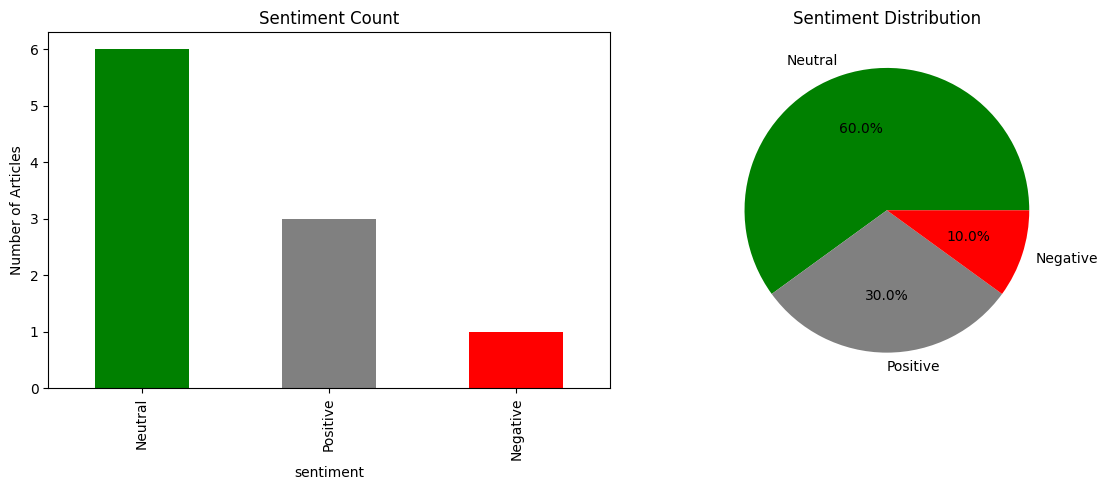

In [13]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

def fetch_news(company, max_articles=10):
    """Fetch news articles with error handling"""
    url = f'https://news.google.com/rss/search?q={company}&hl=en-US&gl=US&ceid=US:en'
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()

        soup = BeautifulSoup(response.content, 'xml')
        return [{
            "title": item.title.text,
            "link": item.link.text,
            "source": item.source.text if item.source else "Unknown"
        } for item in soup.find_all('item')[:max_articles]]

    except Exception as e:
        print(f"Error fetching news: {e}")
        return []

def analyze_sentiment(text):
    """Robust sentiment analysis"""
    try:
        polarity = TextBlob(text).sentiment.polarity
        if polarity > 0.1:
            return "Positive"
        elif polarity < -0.1:
            return "Negative"
        return "Neutral"
    except:
        return "Neutral"

def analyze_news(company):
    """Complete analysis pipeline"""
    news = fetch_news(company)
    if not news:
        print("No news found")
        return None

    # Add sentiment analysis
    for article in news:
        article['sentiment'] = analyze_sentiment(article['title'])

    # Create DataFrame
    df = pd.DataFrame(news)

    # Print results
    print(f"\nSentiment Analysis for {company} News:")
    print("="*50)
    for i, row in df.iterrows():
        print(f"{i+1}. {row['title']}")
        print(f"   Sentiment: {row['sentiment']}")
        print(f"   Source: {row['source']}\n")

    return df

def plot_sentiment(df):
    """Visualize sentiment distribution"""
    if df is None or df.empty:
        return

    counts = df['sentiment'].value_counts()

    plt.figure(figsize=(12, 5))

    # Bar plot
    plt.subplot(1, 2, 1)
    counts.plot(kind='bar', color=['green', 'gray', 'red'])
    plt.title("Sentiment Count")
    plt.ylabel("Number of Articles")

    # Pie chart
    plt.subplot(1, 2, 2)
    counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'gray', 'red'])
    plt.title("Sentiment Distribution")
    plt.ylabel("")

    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    company = "Tesla"
    news_df = analyze_news(company)
    plot_sentiment(news_df)

# Step 3: Comparative Analysis

Code for Comparative Sentiment

In [6]:
sentiment_counts = {"Positive": 0, "Negative": 0, "Neutral": 0}

for article in news:
    sentiment = analyze_sentiment(article["title"])
    sentiment_counts[sentiment] += 1

print("Sentiment Analysis Summary:")
print(sentiment_counts)

Sentiment Analysis Summary:
{'Positive': 4, 'Negative': 1, 'Neutral': 5}



Sentiment Analysis Summary:
Neutral: 5 (50.0%)
Positive: 4 (40.0%)
Negative: 1 (10.0%)

Sentiment Distribution:
Neutral : ██████████████████████████████████████████████████ 5
Positive: ████████████████████████████████████████ 4
Negative: ██████████ 1


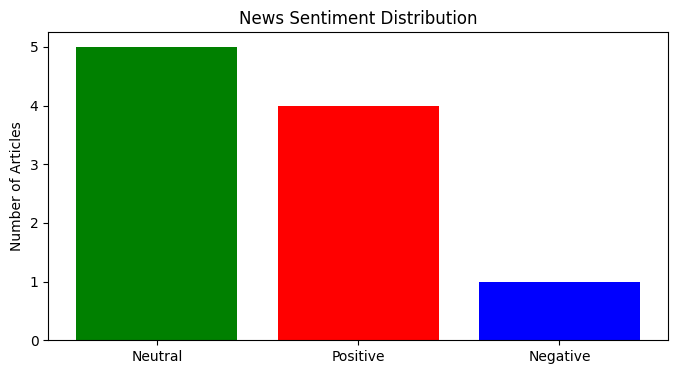

In [12]:
from collections import defaultdict
import matplotlib.pyplot as plt

# Initialize sentiment counter
sentiment_counts = defaultdict(int)

# Analyze each article
for article in news:
    try:
        sentiment = analyze_sentiment(article["title"])
        sentiment_counts[sentiment] += 1
    except Exception as e:
        print(f"Error analyzing article: {e}")
        sentiment_counts["Error"] += 1

# Calculate percentages
total = sum(sentiment_counts.values())
percentages = {k: f"{(v/total)*100:.1f}%" for k, v in sentiment_counts.items()}

# Print results
print("\nSentiment Analysis Summary:")
print("=" * 30)
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment}: {count} ({percentages.get(sentiment, '0%')})")

# Simple ASCII visualization
print("\nSentiment Distribution:")
max_count = max(sentiment_counts.values()) if sentiment_counts else 1
for sentiment, count in sentiment_counts.items():
    bar = '█' * int(50 * count / max_count)
    print(f"{sentiment.ljust(8)}: {bar} {count}")

# Optional: Matplotlib visualization
if sentiment_counts:
    plt.figure(figsize=(8, 4))
    plt.bar(sentiment_counts.keys(), sentiment_counts.values(),
            color=['green', 'red', 'blue', 'gray'])
    plt.title("News Sentiment Distribution")
    plt.ylabel("Number of Articles")
    plt.show()

In [14]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
from collections import defaultdict
import json

# Sample topic keywords (in a real app, you'd use NLP topic modeling)
TOPIC_KEYWORDS = {
    "Electric Vehicles": ["ev", "electric vehicle", "battery", "charging"],
    "Stock Market": ["stock", "share", "investment", "market cap"],
    "Innovation": ["innovation", "breakthrough", "new tech", "invention"],
    "Regulations": ["regulation", "law", "legal", "compliance"],
    "Autonomous Vehicles": ["self-driving", "autonomous", "fsd", "autopilot"]
}

def fetch_news(company, max_articles=5):
    """Fetch news articles from Google News RSS"""
    url = f'https://news.google.com/rss/search?q={company}&hl=en-US&gl=US&ceid=US:en'
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()

        soup = BeautifulSoup(response.content, 'xml')
        items = soup.find_all('item')[:max_articles]

        return [{
            "title": item.title.text,
            "link": item.link.text,
            "summary": item.description.text if item.description else "",
            "source": item.source.text if item.source else "Unknown"
        } for item in items]

    except Exception as e:
        print(f"Error fetching news: {e}")
        return []

def analyze_sentiment(text):
    """Classify sentiment as Positive, Negative, or Neutral"""
    try:
        polarity = TextBlob(text).sentiment.polarity
        if polarity > 0.1:
            return "Positive"
        elif polarity < -0.1:
            return "Negative"
        return "Neutral"
    except:
        return "Neutral"

def extract_topics(text):
    """Simple keyword-based topic extraction"""
    text_lower = text.lower()
    topics = []

    for topic, keywords in TOPIC_KEYWORDS.items():
        if any(keyword in text_lower for keyword in keywords):
            topics.append(topic)

    return topics if topics else ["General"]

def generate_report(company):
    """Generate the complete analysis report"""
    articles = fetch_news(company)
    if not articles:
        return None

    sentiment_counts = defaultdict(int)
    processed_articles = []

    for article in articles:
        sentiment = analyze_sentiment(article["title"])
        sentiment_counts[sentiment] += 1

        processed_articles.append({
            "Title": article["title"],
            "Summary": article["summary"],
            "Sentiment": sentiment,
            "Topics": extract_topics(f"{article['title']} {article['summary']}")
        })

    # Calculate comparative scores (simple ratio)
    total = sum(sentiment_counts.values())
    sentiment_dist = {k: v for k, v in sentiment_counts.items()}

    report = {
        "Company": company,
        "Articles": processed_articles,
        "Comparative Sentiment Score": {
            "Sentiment Distribution": sentiment_dist,
            "Positive Ratio": f"{sentiment_counts['Positive']/total:.1%}" if total else "0%"
        }
    }

    return report

# Example usage
if __name__ == "__main__":
    company = "Tesla"
    report = generate_report(company)

    if report:
        print(json.dumps(report, indent=2))
    else:
        print(f"Failed to generate report for {company}")

{
  "Company": "Tesla",
  "Articles": [
    {
      "Title": "Tesla\u2019s No.1 rival is practically taunting Elon Musk now - CNN",
      "Summary": "<a href=\"https://news.google.com/rss/articles/CBMijgFBVV95cUxPRnNrX29TS3VxejlVRTB0RUhNd0tVNmVlNEtmcUJiU2hKSnBMcnJkT0RFcnNHZnFfXzE3VG5RQjJxWUVER0ZJVTR3ZHI0RF8xaU9KM0NwdHo0cFM4NEJkd3hVUTBNWFUwRXRzZV9HUnpvSkZNV0RUeXUzQWhTVUtKOXhVZmVRSUc0a1NNLVhB0gGEAUFVX3lxTE9WSmZXVmZoQU5mVnJ2cU1vd0hxY2c4NnBQTWJ5aUtRcVlLcG5uTldfLVRLalk5TU5MV1VMWVA2MXRfbGRnN0UzMWxWMEUxSjZnaEloeWg2UVNjVGRBZXdoZFZhSFJxMW91ekpodnRaakNlUmhaLU1neEhDSzFONmZQV1JHaQ?oc=5\" target=\"_blank\">Tesla\u2019s No.1 rival is practically taunting Elon Musk now</a>&nbsp;&nbsp;<font color=\"#6f6f6f\">CNN</font>",
      "Sentiment": "Neutral",
      "Topics": [
        "General"
      ]
    },
    {
      "Title": "Tesla Stock Rises for 5th Straight Session\u2014Watch These Key Price Levels - Investopedia",
      "Summary": "<ol><li><a href=\"https://news.google.com/rss/articles/CBMirgFBVV95cUx

# Step 4: Text-to-Speech (Hindi)

Install gTTS

In [7]:
!pip install gtts


Generate Hindi TTS

In [16]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
from collections import defaultdict
import json
from gtts import gTTS
import os

# Sample topic keywords (in a real app, you'd use NLP topic modeling)
TOPIC_KEYWORDS = {
    "Electric Vehicles": ["ev", "electric vehicle", "battery", "charging"],
    "Stock Market": ["stock", "share", "investment", "market cap"],
    "Innovation": ["innovation", "breakthrough", "new tech", "invention"],
    "Regulations": ["regulation", "law", "legal", "compliance"],
    "Autonomous Vehicles": ["self-driving", "autonomous", "fsd", "autopilot"]
}

def fetch_news(company, max_articles=5):
    """Fetch news articles from Google News RSS"""
    url = f'https://news.google.com/rss/search?q={company}&hl=en-US&gl=US&ceid=US:en'
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()

        soup = BeautifulSoup(response.content, 'xml')
        items = soup.find_all('item')[:max_articles]

        return [{
            "title": item.title.text,
            "link": item.link.text,
            "summary": item.description.text if item.description else "",
            "source": item.source.text if item.source else "Unknown"
        } for item in items]

    except Exception as e:
        print(f"Error fetching news: {e}")
        return []

def analyze_sentiment(text):
    """Classify sentiment as Positive, Negative, or Neutral"""
    try:
        polarity = TextBlob(text).sentiment.polarity
        if polarity > 0.1:
            return "Positive"
        elif polarity < -0.1:
            return "Negative"
        return "Neutral"
    except:
        return "Neutral"

def extract_topics(text):
    """Simple keyword-based topic extraction"""
    text_lower = text.lower()
    topics = []

    for topic, keywords in TOPIC_KEYWORDS.items():
        if any(keyword in text_lower for keyword in keywords):
            topics.append(topic)

    return topics if topics else ["General"]

def generate_report(company):
    """Generate the complete analysis report"""
    articles = fetch_news(company)
    if not articles:
        return None

    sentiment_counts = defaultdict(int)
    processed_articles = []

    for article in articles:
        sentiment = analyze_sentiment(article["title"])
        sentiment_counts[sentiment] += 1

        processed_articles.append({
            "Title": article["title"],
            "Summary": article["summary"],
            "Sentiment": sentiment,
            "Topics": extract_topics(f"{article['title']} {article['summary']}")
        })

    # Calculate comparative scores (simple ratio)
    total = sum(sentiment_counts.values())
    sentiment_dist = {k: v for k, v in sentiment_counts.items()}

    report = {
        "Company": company,
        "Articles": processed_articles,
        "Comparative Sentiment Score": {
            "Sentiment Distribution": sentiment_dist,
            "Positive Ratio": f"{sentiment_counts['Positive']/total:.1%}" if total else "0%"
        }
    }

    return report

def text_to_hindi_audio(text, filename="output.mp3"):
    """Convert text to Hindi audio using gTTS"""
    try:
        tts = gTTS(text=text, lang='hi')
        tts.save(filename)
        print(f"Audio saved as {filename}")
        return True
    except Exception as e:
        print(f"Error generating audio: {e}")
        return False

def generate_hindi_summary(report):
    """Create a Hindi summary text from the report"""
    if not report:
        return "कोई रिपोर्ट उपलब्ध नहीं है"

    company = report["Company"]
    positive = report["Comparative Sentiment Score"]["Sentiment Distribution"].get("Positive", 0)
    negative = report["Comparative Sentiment Score"]["Sentiment Distribution"].get("Negative", 0)
    neutral = report["Comparative Sentiment Score"]["Sentiment Distribution"].get("Neutral", 0)

    summary = f"""
    {company} के लिए समाचार विश्लेषण:
    कुल लेख: {positive + negative + neutral}
    सकारात्मक: {positive}
    नकारात्मक: {negative}
    तटस्थ: {neutral}

    प्रमुख समाचार:
    """

    for i, article in enumerate(report["Articles"][:3], 1):
        sentiment_map = {
            "Positive": "सकारात्मक",
            "Negative": "नकारात्मक",
            "Neutral": "तटस्थ"
        }
        summary += f"""
        {i}. {article['Title']}
        भावना: {sentiment_map.get(article['Sentiment'], article['Sentiment'])}
        """

    return summary

if __name__ == "__main__":
    company = input("कंपनी का नाम दर्ज करें (जैसे Tesla): ")
    report = generate_report(company)

    if report:
        print(json.dumps(report, indent=2))

        # Generate Hindi summary
        hindi_summary = generate_hindi_summary(report)
        print("\nहिंदी सारांश:")
        print(hindi_summary)

        # Convert to audio
        if text_to_hindi_audio(hindi_summary, f"{company}_report_hindi.mp3"):
            print(f"हिंदी ऑडियो रिपोर्ट सफलतापूर्वक बनाई गई: {company}_report_hindi.mp3")
    else:
        print(f"{company} के लिए कोई समाचार नहीं मिला")

कंपनी का नाम दर्ज करें (जैसे Tesla): Tesla
{
  "Company": "Tesla",
  "Articles": [
    {
      "Title": "Tesla\u2019s No.1 rival is practically taunting Elon Musk now - CNN",
      "Summary": "<a href=\"https://news.google.com/rss/articles/CBMijgFBVV95cUxPRnNrX29TS3VxejlVRTB0RUhNd0tVNmVlNEtmcUJiU2hKSnBMcnJkT0RFcnNHZnFfXzE3VG5RQjJxWUVER0ZJVTR3ZHI0RF8xaU9KM0NwdHo0cFM4NEJkd3hVUTBNWFUwRXRzZV9HUnpvSkZNV0RUeXUzQWhTVUtKOXhVZmVRSUc0a1NNLVhB0gGEAUFVX3lxTE9WSmZXVmZoQU5mVnJ2cU1vd0hxY2c4NnBQTWJ5aUtRcVlLcG5uTldfLVRLalk5TU5MV1VMWVA2MXRfbGRnN0UzMWxWMEUxSjZnaEloeWg2UVNjVGRBZXdoZFZhSFJxMW91ekpodnRaakNlUmhaLU1neEhDSzFONmZQV1JHaQ?oc=5\" target=\"_blank\">Tesla\u2019s No.1 rival is practically taunting Elon Musk now</a>&nbsp;&nbsp;<font color=\"#6f6f6f\">CNN</font>",
      "Sentiment": "Neutral",
      "Topics": [
        "General"
      ]
    },
    {
      "Title": "Tesla Stock Rises for 5th Straight Session\u2014Watch These Key Price Levels - Investopedia",
      "Summary": "<ol><li><a href=\"https://n

In [17]:
from IPython.display import Audio, display

# 🔥 Replace 'your_file.mp3' with the name of your MP3 file
mp3_filename = 'Tesla_report_hindi.mp3'

# 🎧 Display and play the audio
display(Audio(mp3_filename))
